In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import chisquare

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
sampleDonorData_df = pd.read_csv("SampleDonorData.csv")

In [3]:
sampleDonorData_df.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
0,0,0,89765,77,0.0,0,S,20.0,U,M,...,72,0,0,A3,0.375,21.0,14,13,21,75
1,0,0,137263,137,0.0,0,C,23.0,H,M,...,97,1,0,A3,0.222,18.0,37,14,18,127
2,0,0,89966,137,2.0,0,C,23.0,H,M,...,78,1,0,A1,0.125,18.0,12,13,18,129
3,0,0,100147,137,2.0,0,S,21.0,H,M,...,79,1,0,A2,0.125,17.0,10,7,15,130
4,0,0,148098,77,2.0,0,S,20.0,H,F,...,42,1,0,A1,0.100,26.0,25,6,26,67


In [4]:
sampleDonorData_df.HOME_OWNER = sampleDonorData_df.HOME_OWNER.replace({"H": 1, "U": 0})

In [5]:
len(sampleDonorData_df)

19372

In [6]:
len(set(sampleDonorData_df["CONTROL_NUMBER"]))

19372

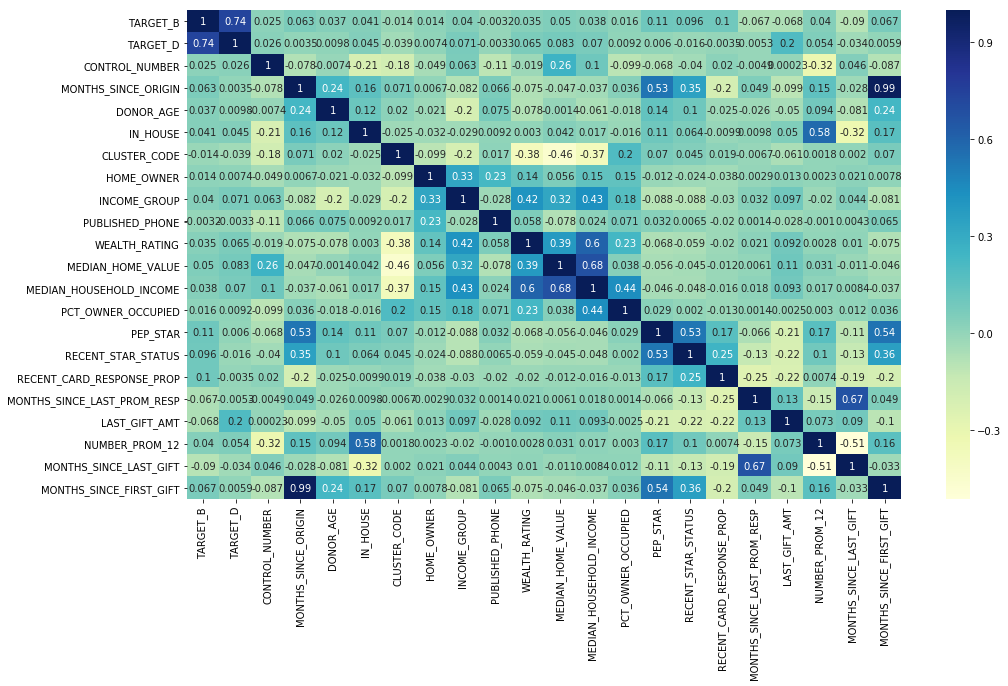

In [7]:
corr = sampleDonorData_df.corr()
plt.figure(figsize=(16,9))
hm = sns.heatmap(corr, annot = True, cmap="YlGnBu")

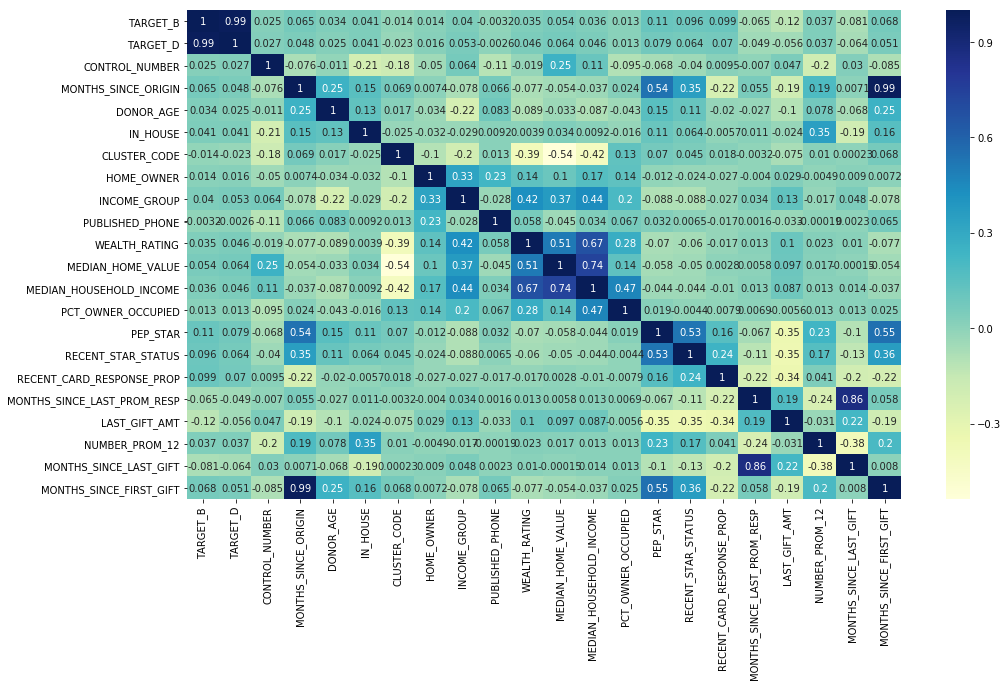

In [8]:
corr = sampleDonorData_df.corr(method='spearman')
plt.figure(figsize=(16,9))
hm = sns.heatmap(corr, annot = True, cmap="YlGnBu")

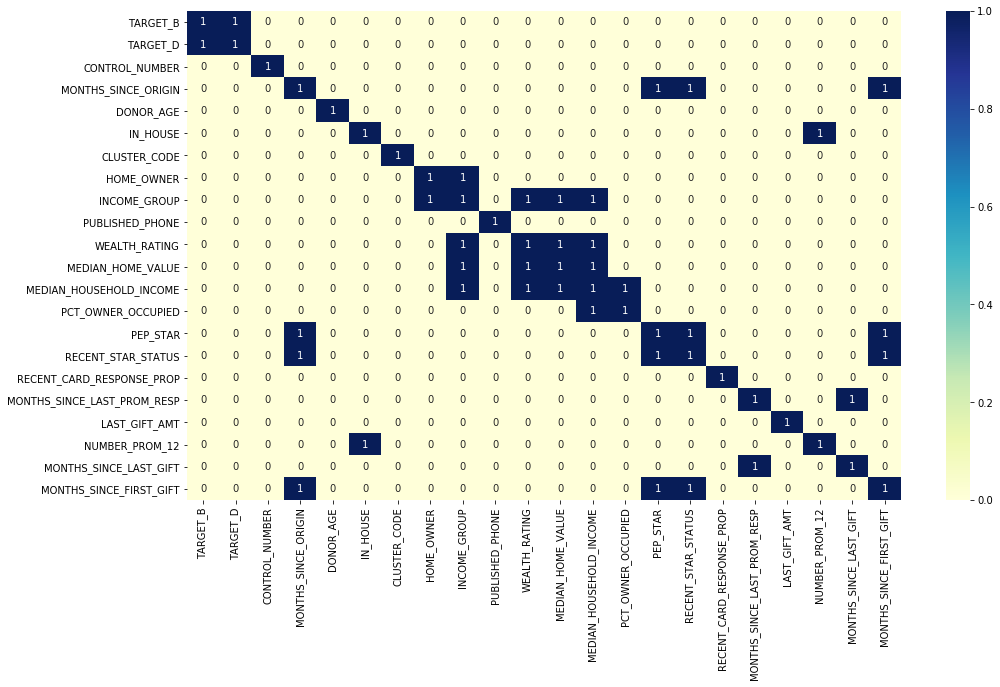

In [9]:
plt.figure(figsize=(16,9))
hm = sns.heatmap(corr> 0.3, annot = True, cmap="YlGnBu")

# problem 1

In [10]:
sampleDonorData_df.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,CLUSTER_CODE,HOME_OWNER,INCOME_GROUP,PUBLISHED_PHONE,...,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
count,19372.000000,19372.000000,19372.000000,19372.000000,14577.000000,19372.000000,18918.000000,19372.000000,14980.000000,19372.000000,...,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19126.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,3.906463,96546.225377,73.409973,58.919051,0.073198,27.861613,0.547491,3.907543,0.497729,...,341.970215,69.698999,0.504439,0.221402,0.230808,19.038900,16.584503,12.901869,18.191152,69.482088
std,0.433024,9.192082,55830.643871,41.255574,16.669382,0.260469,14.451392,0.497752,1.864796,0.500008,...,164.207807,21.711019,0.499993,0.415201,0.186230,3.415559,11.977709,4.642072,4.033065,37.568169
min,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,2.000000,4.000000,15.000000
25%,0.000000,0.000000,48289.000000,29.000000,47.000000,0.000000,15.000000,0.000000,2.000000,0.000000,...,232.000000,60.000000,0.000000,0.000000,0.100000,17.000000,10.000000,11.000000,16.000000,33.000000
50%,0.000000,0.000000,96937.000000,65.000000,60.000000,0.000000,28.000000,1.000000,4.000000,0.000000,...,311.000000,76.000000,1.000000,0.000000,0.200000,18.000000,15.000000,12.000000,18.000000,65.000000
75%,0.250000,0.250000,145429.500000,113.000000,73.000000,0.000000,40.000000,1.000000,5.000000,1.000000,...,417.000000,85.000000,1.000000,0.000000,0.333000,21.000000,20.000000,13.000000,20.000000,105.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,53.000000,1.000000,7.000000,1.000000,...,1500.000000,99.000000,1.000000,1.000000,1.000000,36.000000,450.000000,64.000000,27.000000,260.000000


In [214]:
current_attribute = "DONOR_AGE"

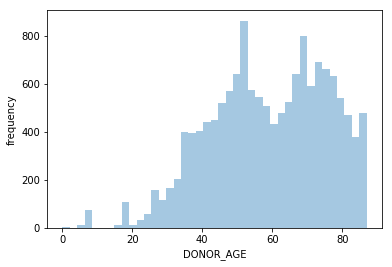

In [215]:
sns.distplot(sampleDonorData_df[sampleDonorData_df[current_attribute].notnull()][current_attribute], kde = False)
plt.ylabel("frequency")
plt.show()

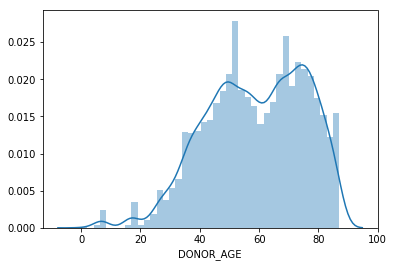

In [24]:
sns.distplot(sampleDonorData_df[sampleDonorData_df[current_attribute].notnull()][current_attribute])
# plt.ylabel("fraction")
plt.show()

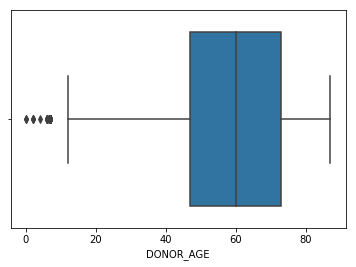

In [15]:
sns.boxplot(sampleDonorData_df[sampleDonorData_df["DONOR_AGE"].notnull()]["DONOR_AGE"])

In [216]:
sampleDonorData_df[current_attribute].describe()

count    14577.000000
mean        58.919051
std         16.669382
min          0.000000
25%         47.000000
50%         60.000000
75%         73.000000
max         87.000000
Name: DONOR_AGE, dtype: float64

In [218]:
sampleDonorData_df[sampleDonorData_df[current_attribute] == 0]

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
0,0,0,89765,77,0.0,0,S,20.0,0,M,...,72,0,0,A3,0.375,21.0,14,13,21,75
1,0,0,137263,137,0.0,0,C,23.0,1,M,...,97,1,0,A3,0.222,18.0,37,14,18,127


In [12]:
column_names = sampleDonorData_df.columns

In [13]:
len(sampleDonorData_df.columns)

25

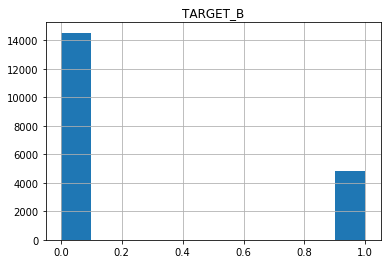

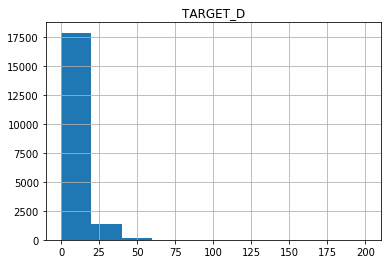

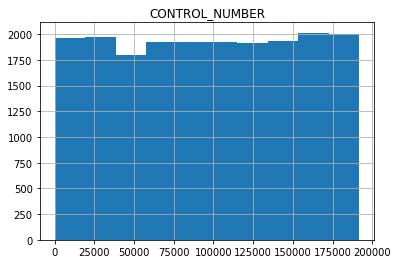

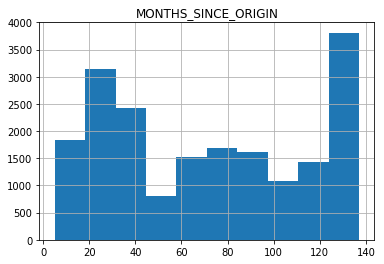

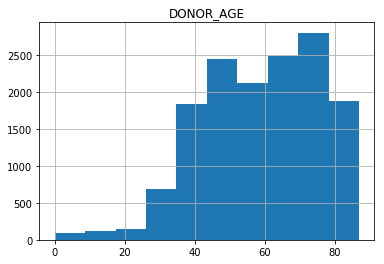

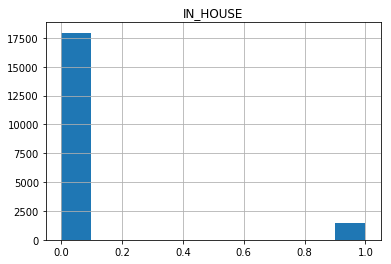

<Figure size 432x288 with 0 Axes>

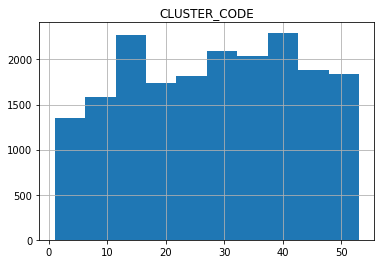

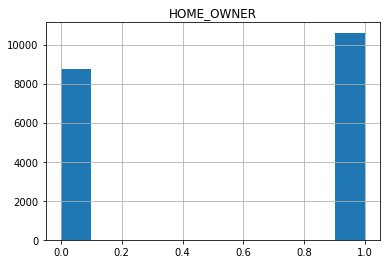

<Figure size 432x288 with 0 Axes>

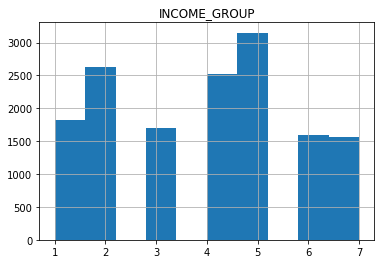

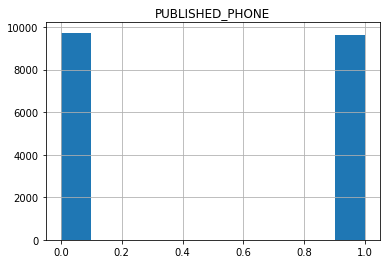

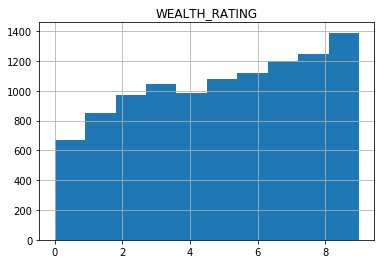

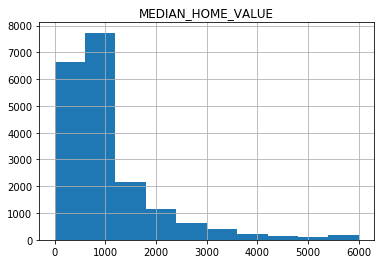

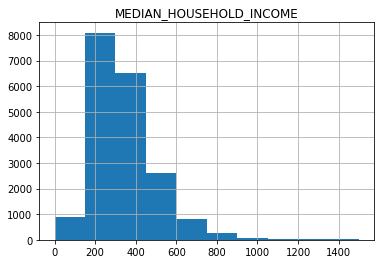

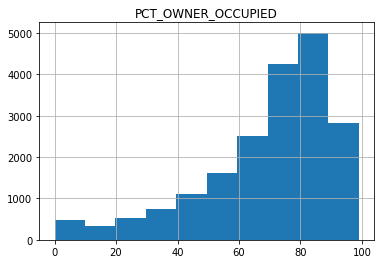

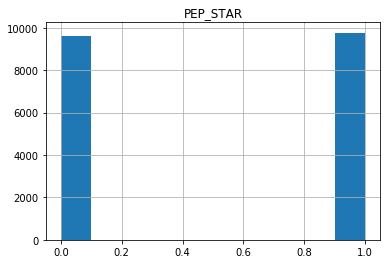

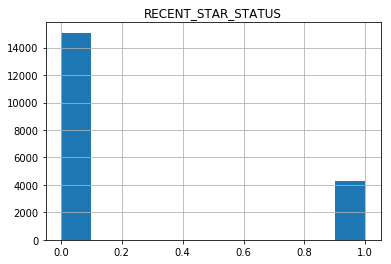

<Figure size 432x288 with 0 Axes>

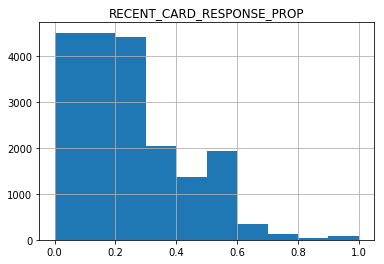

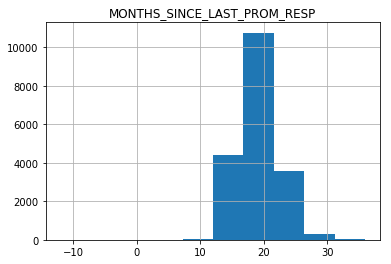

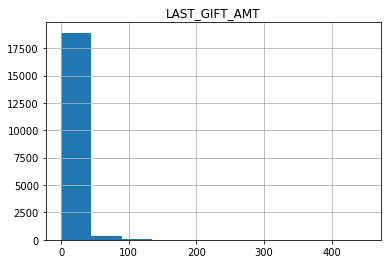

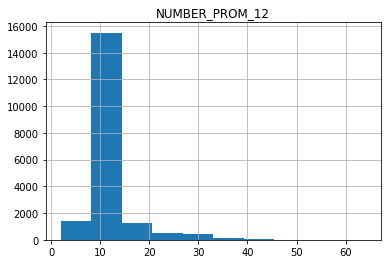

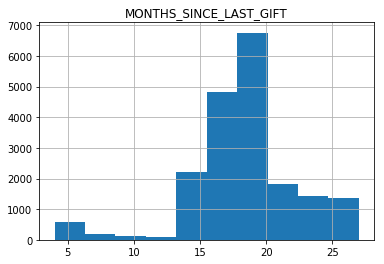

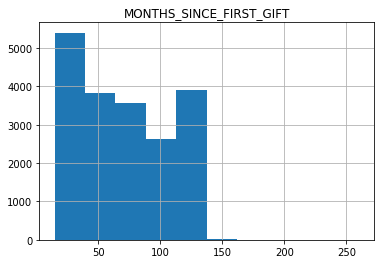

In [14]:
for column_name in column_names:
    try:
        sampleDonorData_df.hist(column = column_name)
    except:
        pass
#     sns.distplot(sampleDonorData_df[sampleDonorData_df[column_name].notnull()][column_name])

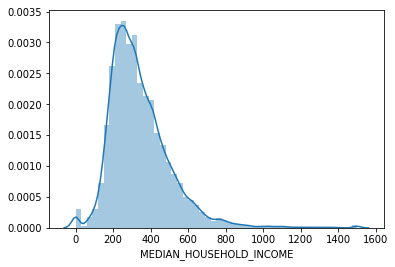

In [15]:
sns.distplot(sampleDonorData_df["MEDIAN_HOUSEHOLD_INCOME"])

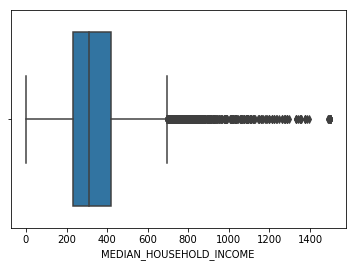

In [29]:
sns.boxplot(sampleDonorData_df[sampleDonorData_df["MEDIAN_HOUSEHOLD_INCOME"].notnull()]["MEDIAN_HOUSEHOLD_INCOME"])

In [16]:
sampleDonorData_df["MEDIAN_HOUSEHOLD_INCOME"].describe()

count    19372.000000
mean       341.970215
std        164.207807
min          0.000000
25%        232.000000
50%        311.000000
75%        417.000000
max       1500.000000
Name: MEDIAN_HOUSEHOLD_INCOME, dtype: float64

In [17]:
column_names

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER',
       'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING',
       'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status',
       'RECENT_CARD_RESPONSE_PROP', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LAST_GIFT_AMT', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT'],
      dtype='object')

In [18]:
continous_variables = ["CONTROL_NUMBER", "MONTHS_SINCE_ORIGIN", "DONOR_AGE", "CLUSTER_CODE", "MEDIAN_HOME_VALUE",
                       "MEDIAN_HOUSEHOLD_INCOME", "PCT_OWNER_OCCUPIED", "RECENT_CARD_RESPONSE_PROP", "MONTHS_SINCE_LAST_PROM_RESP",
                       "LAST_GIFT_AMT", "NUMBER_PROM_12", "MONTHS_SINCE_LAST_GIFT", "MONTHS_SINCE_FIRST_GIFT"]

# probelm 2

In [19]:
sampleDonorData_df[continous_variables].describe()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,CLUSTER_CODE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
count,19372.000000,19372.000000,14577.000000,18918.000000,19372.000000,19372.000000,19372.000000,19372.000000,19126.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,96546.225377,73.409973,58.919051,27.861613,1079.871929,341.970215,69.698999,0.230808,19.038900,16.584503,12.901869,18.191152,69.482088
std,55830.643871,41.255574,16.669382,14.451392,960.753448,164.207807,21.711019,0.186230,3.415559,11.977709,4.642072,4.033065,37.568169
min,5.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,2.000000,4.000000,15.000000
25%,48289.000000,29.000000,47.000000,15.000000,518.000000,232.000000,60.000000,0.100000,17.000000,10.000000,11.000000,16.000000,33.000000
50%,96937.000000,65.000000,60.000000,28.000000,747.000000,311.000000,76.000000,0.200000,18.000000,15.000000,12.000000,18.000000,65.000000
75%,145429.500000,113.000000,73.000000,40.000000,1227.000000,417.000000,85.000000,0.333000,21.000000,20.000000,13.000000,20.000000,105.000000
max,191779.000000,137.000000,87.000000,53.000000,6000.000000,1500.000000,99.000000,1.000000,36.000000,450.000000,64.000000,27.000000,260.000000


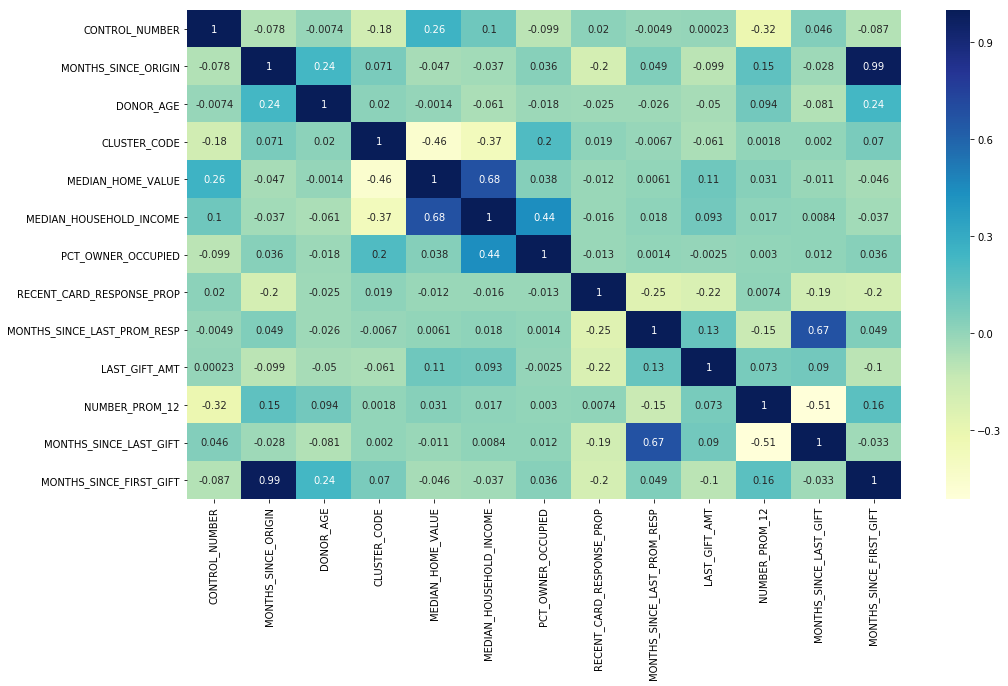

In [20]:
corr = sampleDonorData_df[continous_variables].corr()
plt.figure(figsize=(16,9))
hm = sns.heatmap(corr, annot = True, cmap="YlGnBu")

# Chi square

In [28]:
chisquare(sampleDonorData_df["HOME_OWNER"])

Power_divergenceResult(statistic=8766.0, pvalue=1.0)

In [21]:
# sns.pairplot(sampleDonorData_df.dropna())

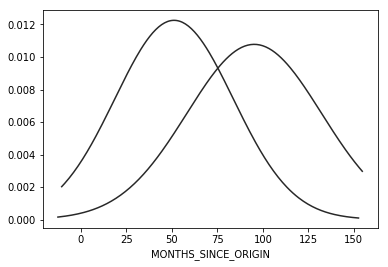

In [22]:
sns.distplot(sampleDonorData_df[sampleDonorData_df["PEP_STAR"] == 1.0]["MONTHS_SINCE_ORIGIN"].dropna(), kde = 0, hist = 0, fit = norm , label = "1", color = 'red')
sns.distplot(sampleDonorData_df[sampleDonorData_df["PEP_STAR"] == 0.0]["MONTHS_SINCE_ORIGIN"].dropna(), kde = 0, hist = 0, fit = norm , label = "0" , color = 'blue')

In [23]:
def histogram_plot(df, attribute, target):
    plt.figure(figsize=(12, 8))
    plt.subplot(2,2,1)
    sns.violinplot(x = target, y = attribute, data = df)
    plt.subplot(2,2,2)
    sns.distplot(df[df[target] == 1.0][attribute].dropna() , label = "1", color = 'red')
    sns.distplot(df[df[target] == 0.0][attribute].dropna() , label = "0" , color = 'blue')
#     plt.subplot(2,2,3)
#     sns.distplot(sampleDonorData_df[sampleDonorData_df[target] == 1.0][attribute].dropna(), kde = 0, hist = 0, fit = norm)
#     plt.subplot(2,2,4)
#     sns.distplot(sampleDonorData_df[sampleDonorData_df[target] == 0.0][attribute].dropna(), kde = 0, hist = 0, fit = norm)
    plt.show()

In [24]:
def pie_plot(df, attribute, target):
    f,ax=plt.subplots(1,2,figsize=(12,8))
    df[df[target] == 0][attribute].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title(target + " is 0 by "+ attribute)
    df[df[target] == 1][attribute].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
    ax[1].set_title(target + " is 1 by "+ attribute)
    plt.show()

In [25]:
# pie_plot(sampleDonorData_df, "MONTHS_SINCE_ORIGIN", "PEP_STAR")

In [26]:
# binary_variables

In [27]:
# plt.figure(figsize=(12, 8))
# sns.factorplot(x="DONOR_GENDER", y="MONTHS_SINCE_ORIGIN", hue="TARGET_B", data=sampleDonorData_df, kind="violin", split=True, height=4, aspect=.7);
# plt.show()

In [28]:
# count_1, value_1 = np.histogram(sampleDonorData_df[sampleDonorData_df["PEP_STAR"] == 1.0]["MONTHS_SINCE_ORIGIN"].dropna())
# count_0, value_0 = np.histogram(sampleDonorData_df[sampleDonorData_df["PEP_STAR"] == 0.0]["MONTHS_SINCE_ORIGIN"].dropna())

# if np.all(value_0 == value_1):
#     percentage_array = np.vstack((count_0/(count_0+count_1)*100, count_1/(count_0+count_1)*100)).T
#     print(value_0.shape)
#     percentage_df = pd.DataFrame(data=percentage_array, index= value_0)
#     print(percentage_df)


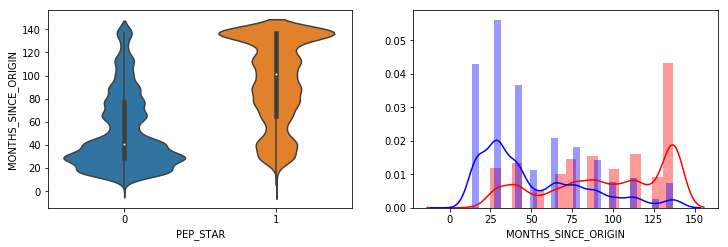

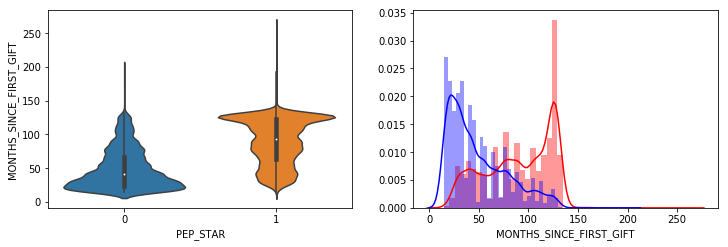

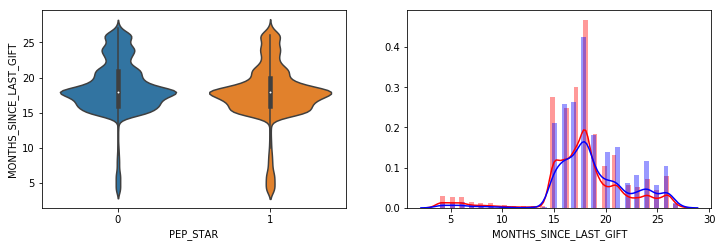

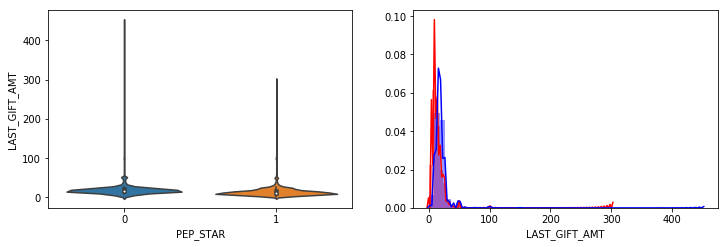

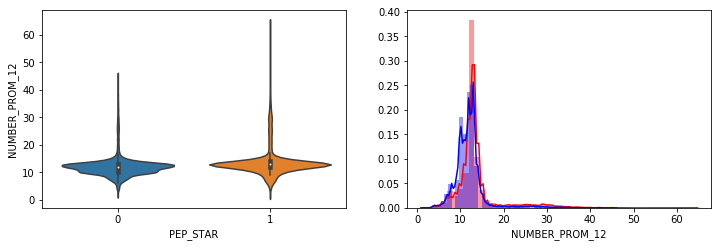

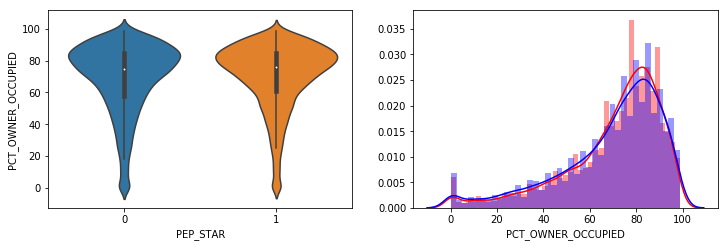

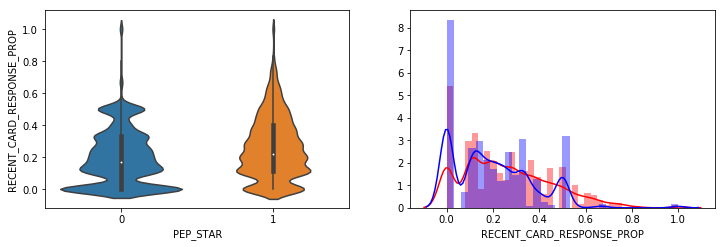

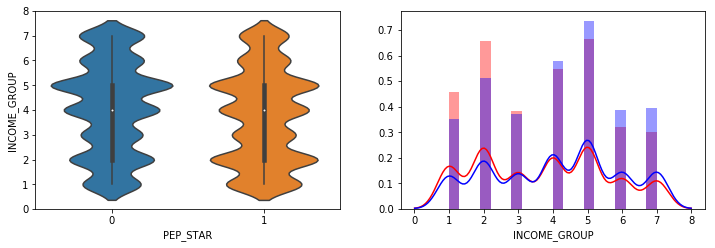

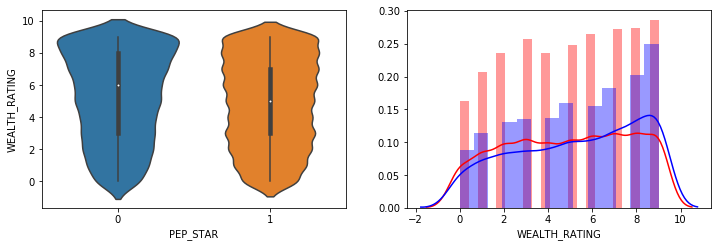

In [29]:
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_ORIGIN", "PEP_STAR")
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_FIRST_GIFT", "PEP_STAR")
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_LAST_GIFT", "PEP_STAR")
histogram_plot(sampleDonorData_df, "LAST_GIFT_AMT", "PEP_STAR")
histogram_plot(sampleDonorData_df, "NUMBER_PROM_12", "PEP_STAR")
histogram_plot(sampleDonorData_df, "PCT_OWNER_OCCUPIED", "PEP_STAR")
histogram_plot(sampleDonorData_df, "RECENT_CARD_RESPONSE_PROP", "PEP_STAR")

histogram_plot(sampleDonorData_df, "INCOME_GROUP", "PEP_STAR")
histogram_plot(sampleDonorData_df, "WEALTH_RATING", "PEP_STAR")

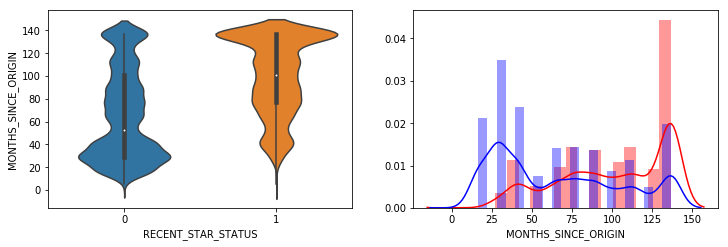

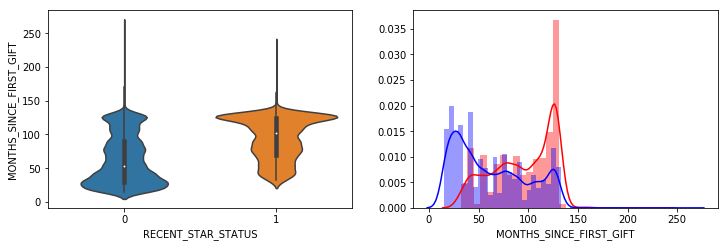

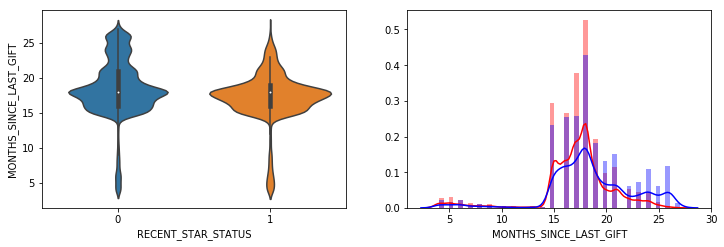

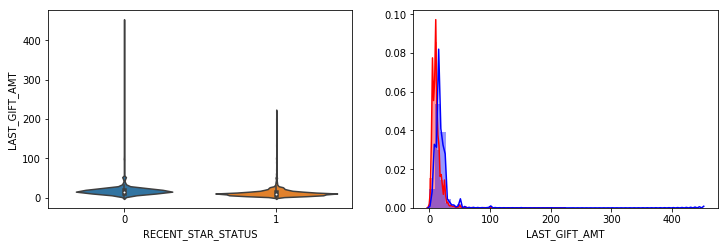

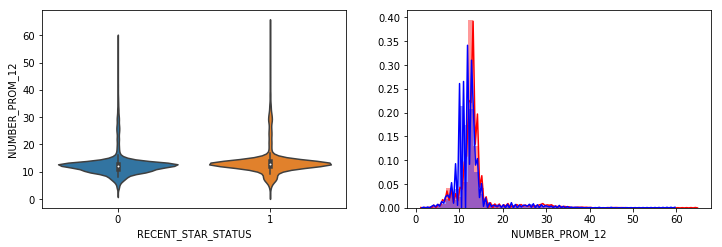

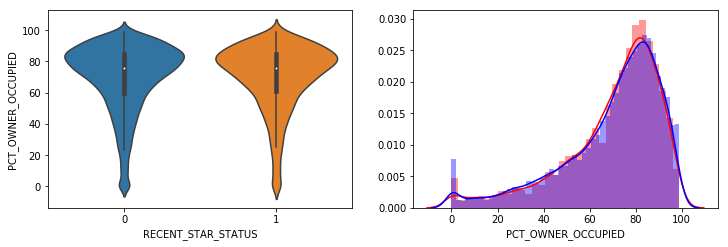

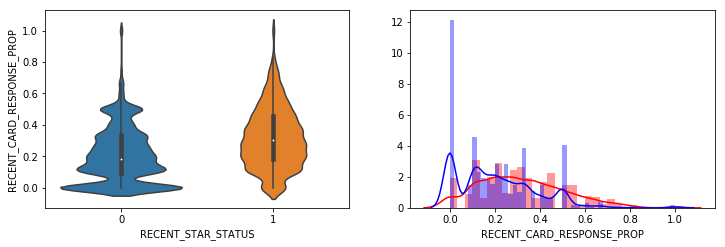

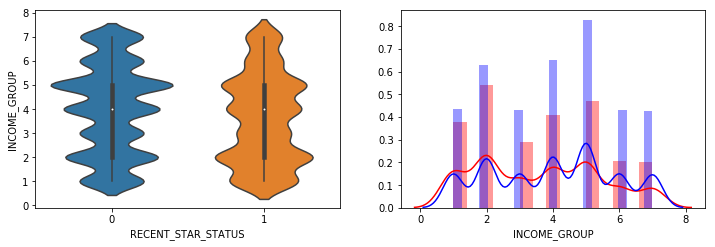

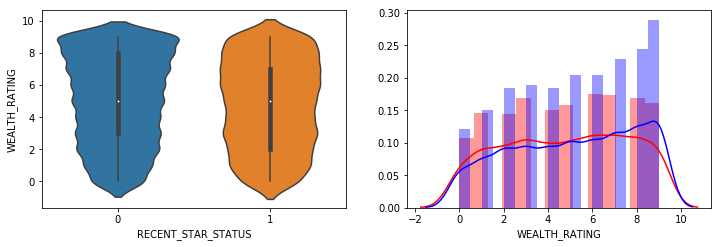

In [30]:
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_ORIGIN", "RECENT_STAR_STATUS")
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_FIRST_GIFT", "RECENT_STAR_STATUS")
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_LAST_GIFT", "RECENT_STAR_STATUS")
histogram_plot(sampleDonorData_df, "LAST_GIFT_AMT", "RECENT_STAR_STATUS")
histogram_plot(sampleDonorData_df, "NUMBER_PROM_12", "RECENT_STAR_STATUS")
histogram_plot(sampleDonorData_df, "PCT_OWNER_OCCUPIED", "RECENT_STAR_STATUS")
histogram_plot(sampleDonorData_df, "RECENT_CARD_RESPONSE_PROP", "RECENT_STAR_STATUS")

histogram_plot(sampleDonorData_df, "INCOME_GROUP", "RECENT_STAR_STATUS")
histogram_plot(sampleDonorData_df, "WEALTH_RATING", "RECENT_STAR_STATUS")

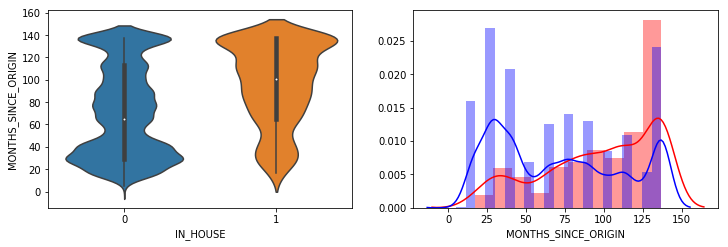

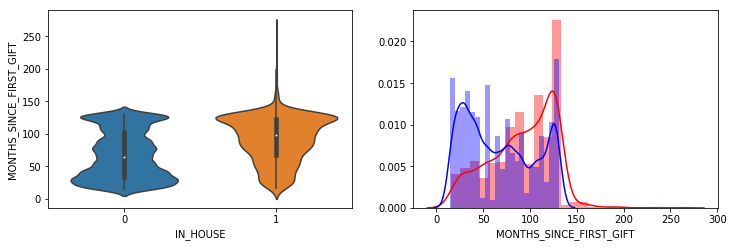

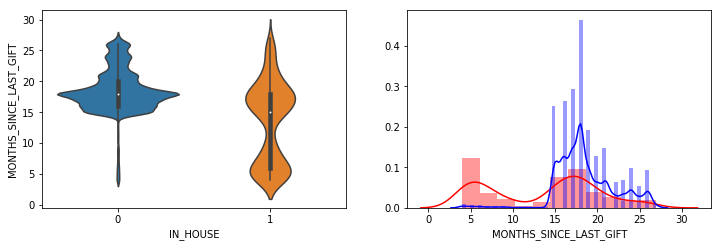

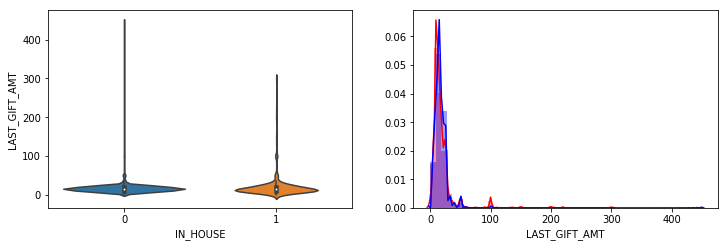

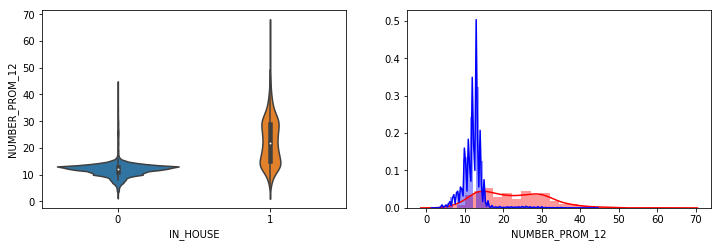

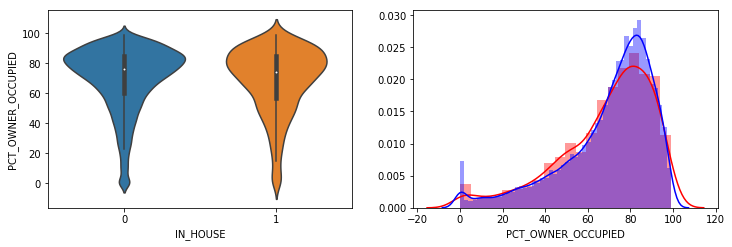

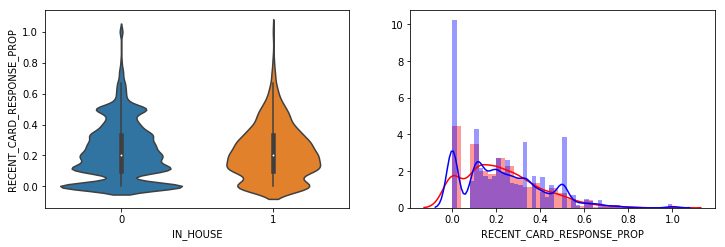

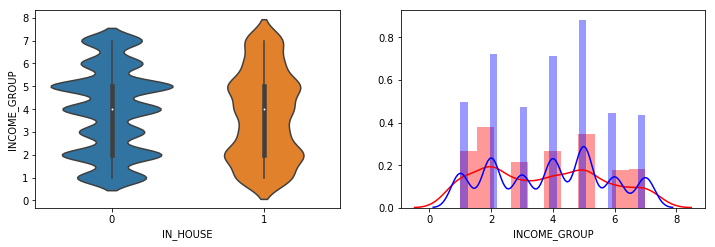

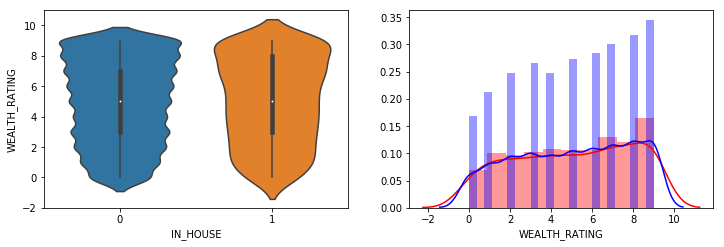

In [31]:
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_ORIGIN", "IN_HOUSE")
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_FIRST_GIFT", "IN_HOUSE")
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_LAST_GIFT", "IN_HOUSE")
histogram_plot(sampleDonorData_df, "LAST_GIFT_AMT", "IN_HOUSE")
histogram_plot(sampleDonorData_df, "NUMBER_PROM_12", "IN_HOUSE")
histogram_plot(sampleDonorData_df, "PCT_OWNER_OCCUPIED", "IN_HOUSE")
histogram_plot(sampleDonorData_df, "RECENT_CARD_RESPONSE_PROP", "IN_HOUSE")

histogram_plot(sampleDonorData_df, "INCOME_GROUP", "IN_HOUSE")
histogram_plot(sampleDonorData_df, "WEALTH_RATING", "IN_HOUSE")

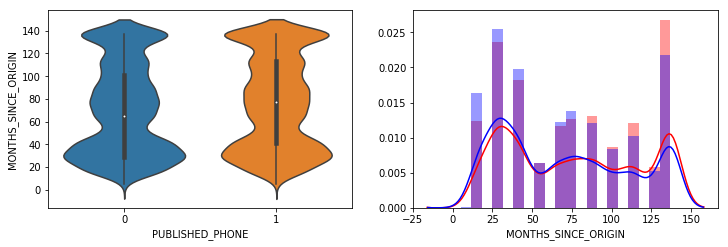

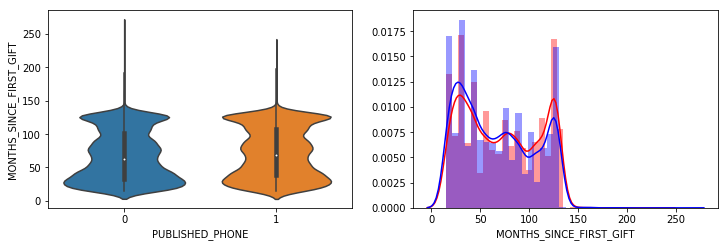

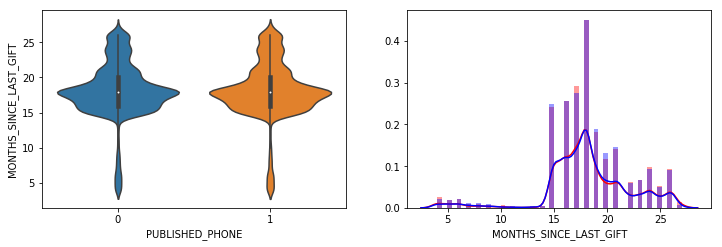

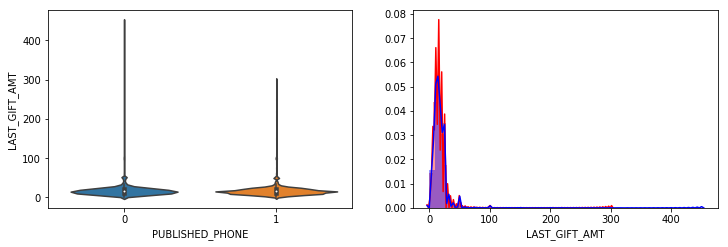

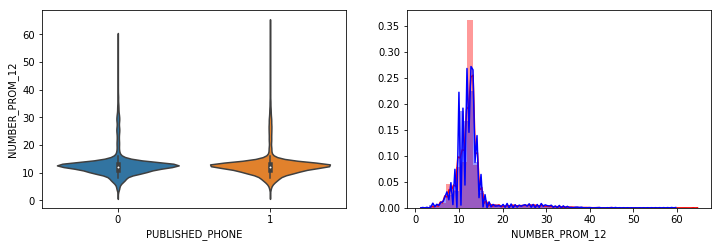

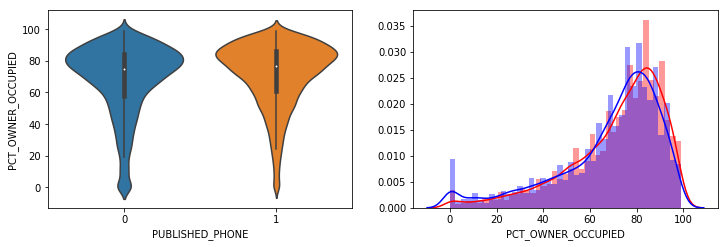

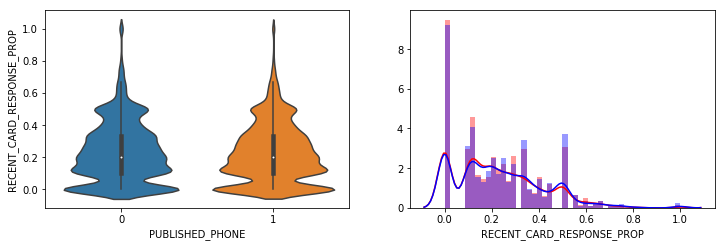

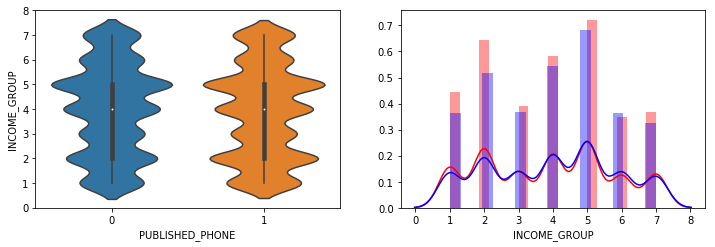

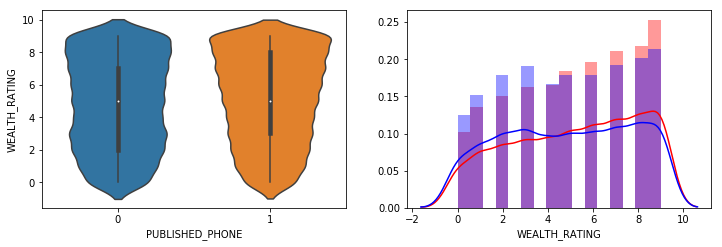

In [32]:
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_ORIGIN", "PUBLISHED_PHONE")
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_FIRST_GIFT", "PUBLISHED_PHONE")
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_LAST_GIFT", "PUBLISHED_PHONE")
histogram_plot(sampleDonorData_df, "LAST_GIFT_AMT", "PUBLISHED_PHONE")
histogram_plot(sampleDonorData_df, "NUMBER_PROM_12", "PUBLISHED_PHONE")
histogram_plot(sampleDonorData_df, "PCT_OWNER_OCCUPIED", "PUBLISHED_PHONE")
histogram_plot(sampleDonorData_df, "RECENT_CARD_RESPONSE_PROP", "PUBLISHED_PHONE")

histogram_plot(sampleDonorData_df, "INCOME_GROUP", "PUBLISHED_PHONE")
histogram_plot(sampleDonorData_df, "WEALTH_RATING", "PUBLISHED_PHONE")

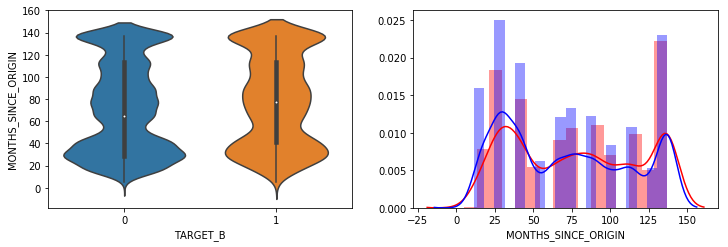

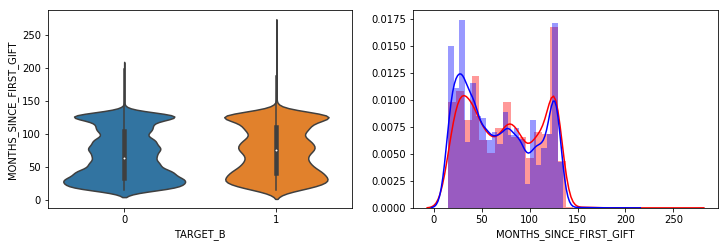

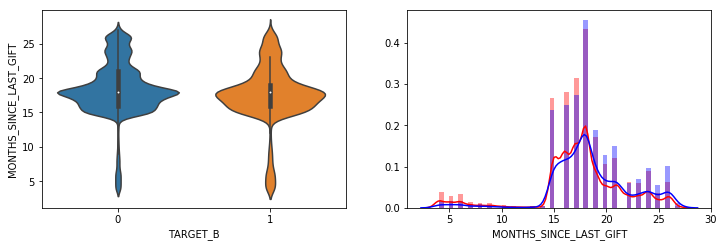

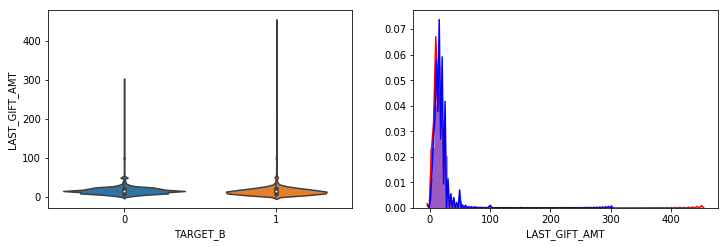

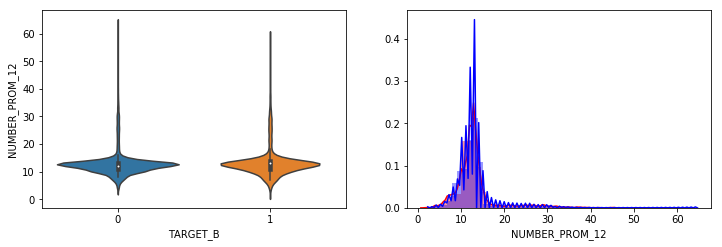

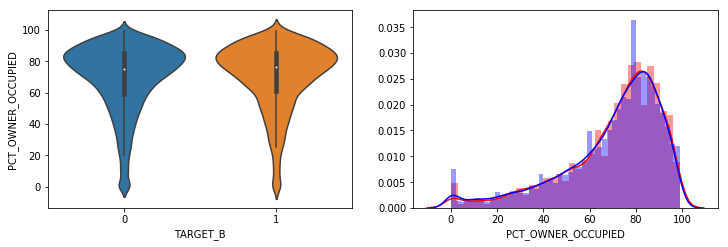

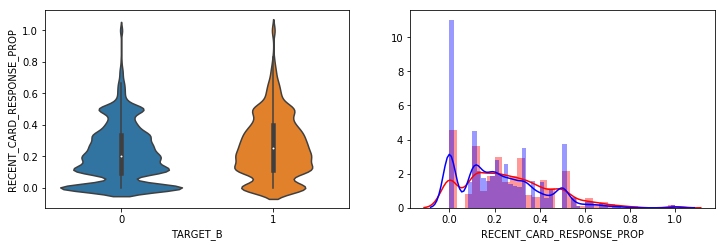

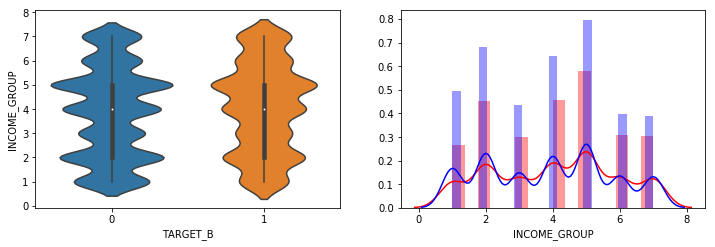

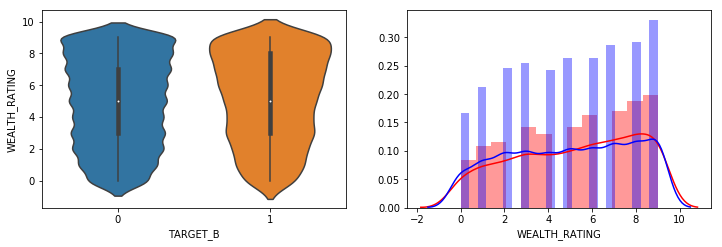

In [102]:
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_ORIGIN", "TARGET_B")
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_FIRST_GIFT", "TARGET_B")
histogram_plot(sampleDonorData_df, "MONTHS_SINCE_LAST_GIFT", "TARGET_B")
histogram_plot(sampleDonorData_df, "LAST_GIFT_AMT", "TARGET_B")
histogram_plot(sampleDonorData_df, "NUMBER_PROM_12", "TARGET_B")
histogram_plot(sampleDonorData_df, "PCT_OWNER_OCCUPIED", "TARGET_B")
histogram_plot(sampleDonorData_df, "RECENT_CARD_RESPONSE_PROP", "TARGET_B")

histogram_plot(sampleDonorData_df, "INCOME_GROUP", "TARGET_B")
histogram_plot(sampleDonorData_df, "WEALTH_RATING", "TARGET_B")

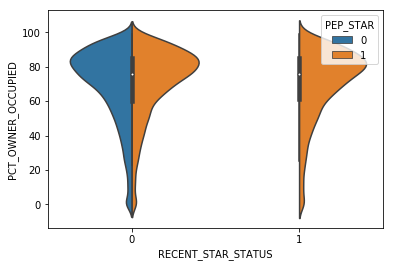

In [33]:
sns.violinplot("RECENT_STAR_STATUS","PCT_OWNER_OCCUPIED",hue="PEP_STAR", data=sampleDonorData_df,split=True)
plt.show()

In [209]:
target

'IN_HOUSE'

In [216]:
sampleDonorData_df[target].describe()

count    19372.000000
mean         0.073198
std          0.260469
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: IN_HOUSE, dtype: float64

In [208]:
attributes

['MONTHS_SINCE_ORIGIN',
 'MONTHS_SINCE_FIRST_GIFT',
 'MONTHS_SINCE_LAST_GIFT',
 'NUMBER_PROM_12']

In [219]:
sampleDonorData_df.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER',
       'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING',
       'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status',
       'RECENT_CARD_RESPONSE_PROP', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LAST_GIFT_AMT', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT'],
      dtype='object')

In [30]:
def scatter_plot(attribute1, attribute2, target):
    plt.figure(figsize=(16,9))
    plt.scatter(sampleDonorData_df[sampleDonorData_df[target] == 0][attribute1],
                sampleDonorData_df[sampleDonorData_df[target] == 0][attribute2], label = "0")
    plt.scatter(sampleDonorData_df[sampleDonorData_df[target] == 1][attribute1],
                sampleDonorData_df[sampleDonorData_df[target] == 1][attribute2], label = "1")
    plt.xlabel(attribute1)
    plt.ylabel(attribute2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
    

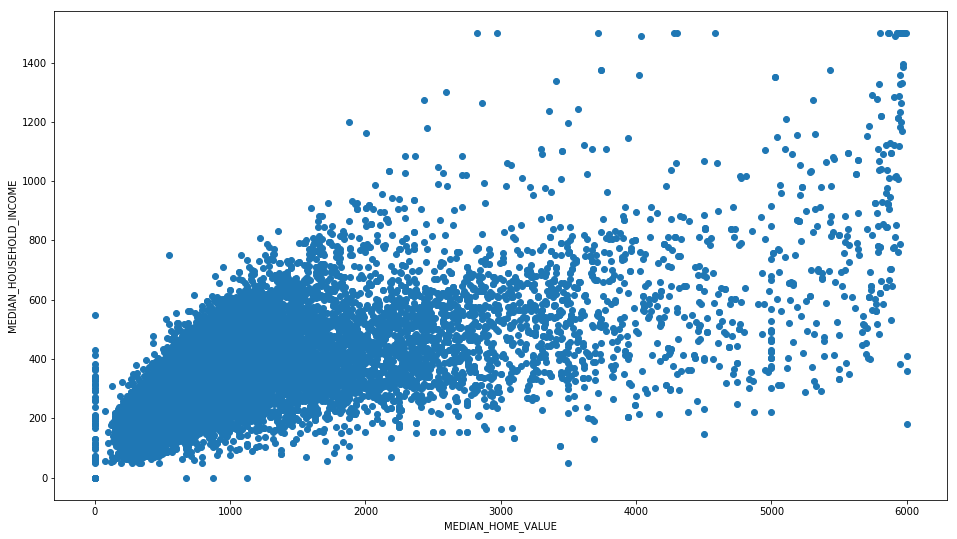

In [224]:
plt.figure(figsize=(16,9))
plt.scatter(sampleDonorData_df["MEDIAN_HOME_VALUE"], sampleDonorData_df["MEDIAN_HOUSEHOLD_INCOME"])
plt.xlabel("MEDIAN_HOME_VALUE")
plt.ylabel("MEDIAN_HOUSEHOLD_INCOME")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.show()

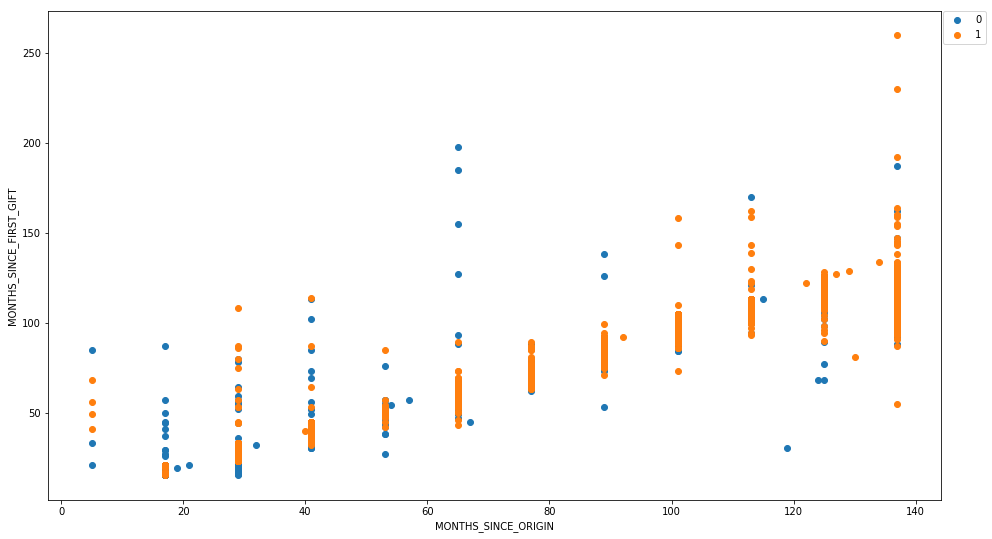

In [31]:
scatter_plot("MONTHS_SINCE_ORIGIN", "MONTHS_SINCE_FIRST_GIFT", "PEP_STAR")

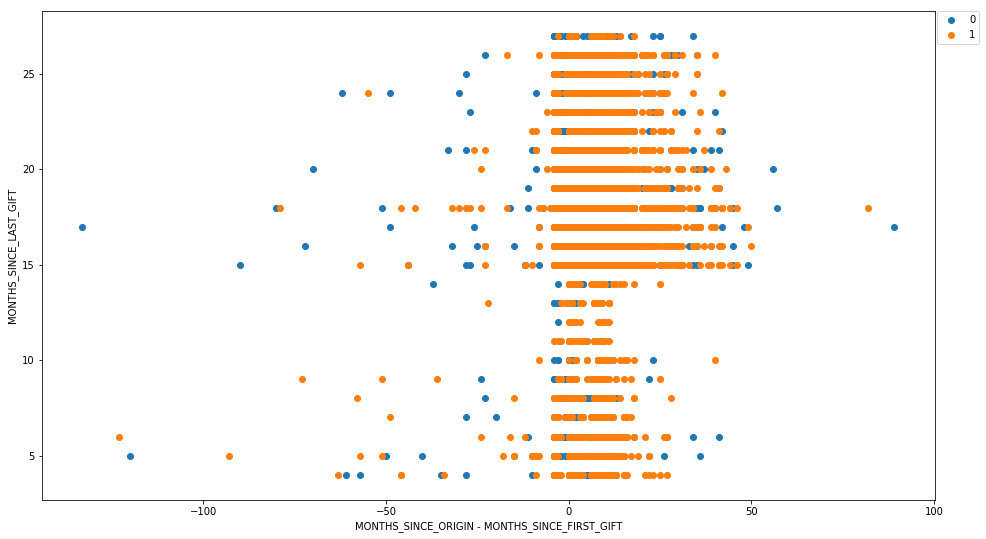

In [115]:
time_for_first_gift = sampleDonorData_df["MONTHS_SINCE_ORIGIN"] - sampleDonorData_df["MONTHS_SINCE_FIRST_GIFT"]
index_0 = sampleDonorData_df["PEP_STAR"] == 0
index_1 = sampleDonorData_df["PEP_STAR"] == 1

plt.figure(figsize=(16,9))
plt.scatter(time_for_first_gift[index_0], sampleDonorData_df[index_0]["MONTHS_SINCE_LAST_GIFT"], label = "0")
plt.scatter(time_for_first_gift[index_1], sampleDonorData_df[index_1]["MONTHS_SINCE_LAST_GIFT"], label = "1")
plt.xlabel("MONTHS_SINCE_ORIGIN - MONTHS_SINCE_FIRST_GIFT")
plt.ylabel("MONTHS_SINCE_LAST_GIFT")
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.show()

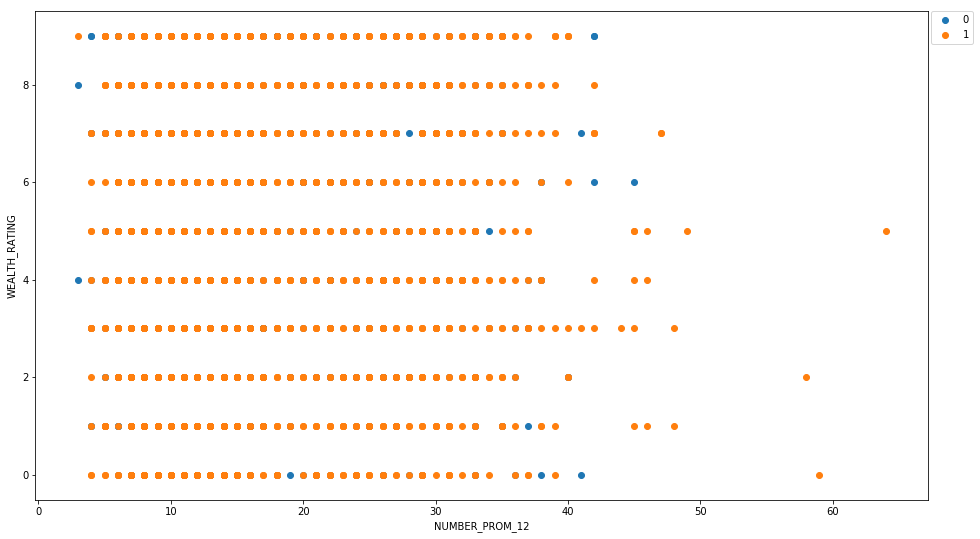

In [33]:
scatter_plot("NUMBER_PROM_12", "WEALTH_RATING", "PEP_STAR")

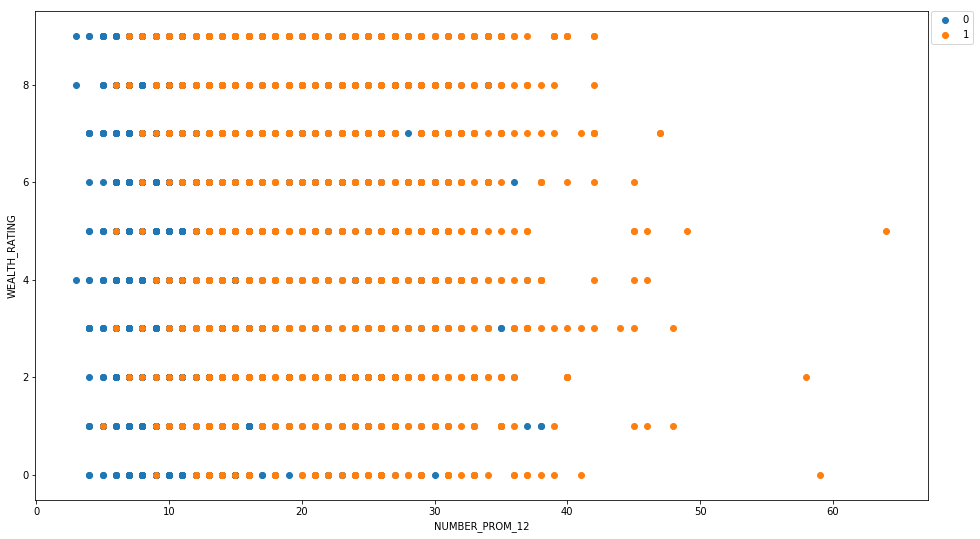

In [34]:
scatter_plot("NUMBER_PROM_12", "WEALTH_RATING", "IN_HOUSE")

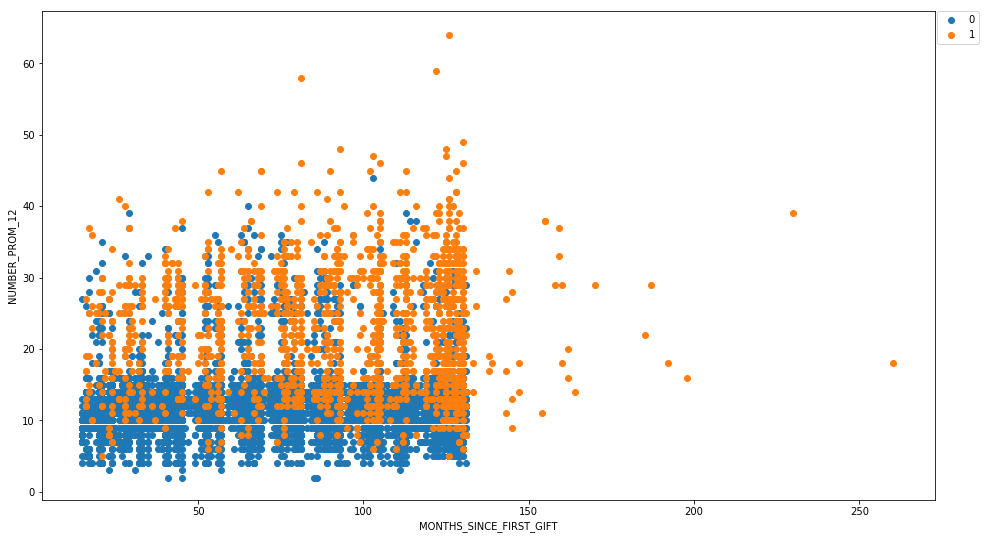

In [35]:
scatter_plot("MONTHS_SINCE_FIRST_GIFT", "NUMBER_PROM_12", "IN_HOUSE")

In [40]:
sampleDonorData_df.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER',
       'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING',
       'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status',
       'RECENT_CARD_RESPONSE_PROP', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LAST_GIFT_AMT', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT'],
      dtype='object')

In [41]:
# binary_variables

# probelm 3

In [229]:
attributes = ["INCOME_GROUP", "WEALTH_RATING", "MEDIAN_HOME_VALUE", "PCT_OWNER_OCCUPIED"]
# attributes = ["INCOME_GROUP", "MEDIAN_HOME_VALUE", "PCT_OWNER_OCCUPIED"]
target = "MEDIAN_HOUSEHOLD_INCOME"

In [251]:
sampleDonorData_df[attributes].describe()

,INCOME_GROUP,WEALTH_RATING,MEDIAN_HOME_VALUE,PCT_OWNER_OCCUPIED
count,14980.000000,10562.000000,19372.000000,19372.000000
mean,3.907543,5.005397,1079.871929,69.698999
std,1.864796,2.815386,960.753448,21.711019
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,518.000000,60.000000
50%,4.000000,5.000000,747.000000,76.000000
75%,5.000000,7.000000,1227.000000,85.000000
max,7.000000,9.000000,6000.000000,99.000000


In [231]:
set(sampleDonorData_df["INCOME_GROUP"].dropna())

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}

In [232]:
# # X = sampleDonorData_df[["MONTHS_SINCE_ORIGIN", "PEP_STAR", "RECENT_STAR_STATUS"]].values
# X = sampleDonorData_df["MONTHS_SINCE_ORIGIN"].values
# X = X.reshape(-1, 1)
# y = sampleDonorData_df["MONTHS_SINCE_FIRST_GIFT"].values

In [233]:
index = sampleDonorData_df[attributes].dropna().index
new_sampleDonorData_df = pd.get_dummies(sampleDonorData_df.loc[index][attributes], columns=["INCOME_GROUP", "WEALTH_RATING"])
X = new_sampleDonorData_df.values
# X = sampleDonorData_df["MONTHS_SINCE_ORIGIN"].values
# X = X.reshape(-1, 1)
y = sampleDonorData_df.loc[index][target].values

In [239]:
new_sampleDonorData_df.describe()

,MEDIAN_HOME_VALUE,PCT_OWNER_OCCUPIED,INCOME_GROUP_1.0,INCOME_GROUP_2.0,INCOME_GROUP_3.0,INCOME_GROUP_4.0,INCOME_GROUP_5.0,INCOME_GROUP_6.0,INCOME_GROUP_7.0,WEALTH_RATING_0.0,WEALTH_RATING_1.0,WEALTH_RATING_2.0,WEALTH_RATING_3.0,WEALTH_RATING_4.0,WEALTH_RATING_5.0,WEALTH_RATING_6.0,WEALTH_RATING_7.0,WEALTH_RATING_8.0,WEALTH_RATING_9.0
count,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000,8265.000000
mean,1057.868966,71.410889,0.126316,0.181851,0.112644,0.167937,0.203872,0.104537,0.102843,0.063158,0.077798,0.091107,0.099093,0.091591,0.101754,0.108046,0.114580,0.119782,0.133091
std,940.537001,19.994749,0.332225,0.385745,0.316176,0.373833,0.402899,0.305975,0.303773,0.243261,0.267870,0.287779,0.298804,0.288465,0.302343,0.310457,0.318533,0.324726,0.339694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,512.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,732.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1186.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5993.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [235]:
sampleDonorData_df.loc[index][target].describe()

count    8265.000000
mean      345.404961
std       162.746800
min         0.000000
25%       235.000000
50%       314.000000
75%       420.000000
max      1500.000000
Name: MEDIAN_HOUSEHOLD_INCOME, dtype: float64

In [236]:
len(index)

8265

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

reg = LinearRegression()
scores = cross_validate(reg, X, y, cv=5, scoring= "neg_mean_squared_error")

In [238]:
X_test

array([[1117,   72,    0, ...,    0,    0,    0],
       [1813,   73,    0, ...,    1,    0,    0],
       [1058,   68,    0, ...,    0,    1,    0],
       ...,
       [ 660,   89,    0, ...,    0,    0,    0],
       [ 651,   86,    0, ...,    0,    0,    0],
       [ 948,   92,    0, ...,    0,    1,    0]], dtype=int64)

In [117]:
scores

{'fit_time': array([0.00700092, 0.00700092, 0.00400019, 0.00500035, 0.00400019]),
 'score_time': array([0.00100017, 0.        , 0.00100017, 0.        , 0.        ]),
 'test_score': array([-7140.47113271, -7284.04894487, -7155.9181704 , -6590.5938122 ,
        -7347.62055108]),
 'train_score': array([-7017.80474323, -6982.66953323, -7008.42999474, -7159.04885394,
        -6964.13216269])}

In [118]:
training_error = -np.mean(scores["train_score"])
testing_error = -np.mean(scores["test_score"])

In [119]:
print("mean square error for training is", training_error, "testing is", testing_error)

training error is 7026.417057566857 testing error is 7103.730522251186


In [242]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

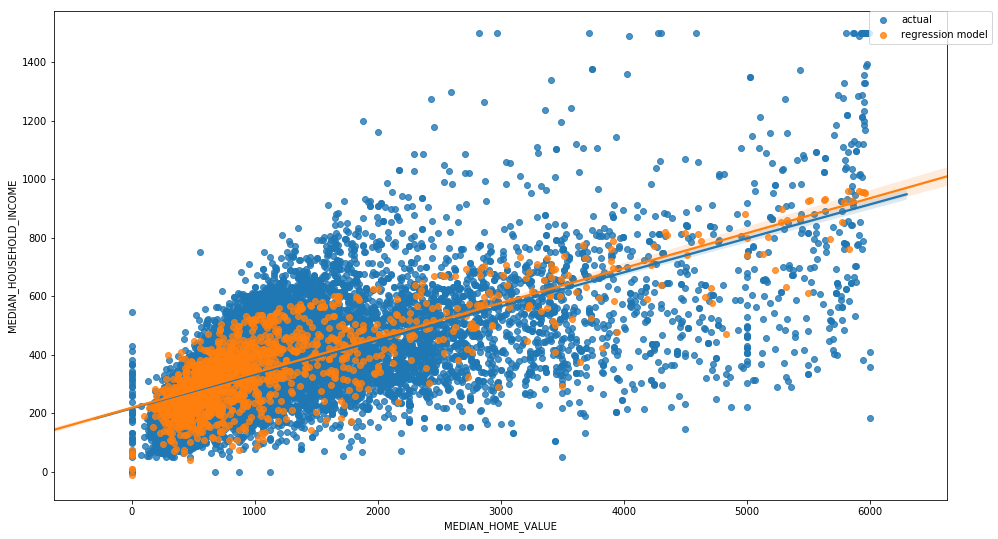

In [250]:
plt.figure(figsize=(16,9))
sns.regplot(sampleDonorData_df["MEDIAN_HOME_VALUE"], sampleDonorData_df["MEDIAN_HOUSEHOLD_INCOME"], label = "actual")
sns.regplot(X_test[:,0], reg.predict(X_test), label = "regression model")
plt.xlabel("MEDIAN_HOME_VALUE")
plt.ylabel("MEDIAN_HOUSEHOLD_INCOME")
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.show()

# Problem 4

In [60]:
from sklearn.svm import SVR

In [61]:
clf = SVR(epsilon=0.2)
clf.fit(X_train, y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [62]:
y_pred = clf.predict(X_test)

In [63]:
mse_error = mean_squared_error(y_test, y_pred)
print("mean sqaured error", mse_error)

mean sqaured error 26102.968737320316


In [122]:
training_error = []
testing_error = []

from sklearn.neighbors import KNeighborsRegressor
neighbours_list = list(range(1,20,2))
for number_of_neighbours in neighbours_list:
    neigh = KNeighborsRegressor(n_neighbors=number_of_neighbours)
    
    scores = cross_validate(neigh, X, y, cv=5, scoring= "neg_mean_squared_error")
    
    acc = -np.mean(scores['train_score'])
    training_error.append(acc)
    acc = -np.mean(scores['test_score'])
    testing_error.append(acc)

optimal_neighbours_at_index = np.argmin(np.array(testing_error))
optimal_number_of_neighbours = neighbours_list[optimal_neighbours_at_index]

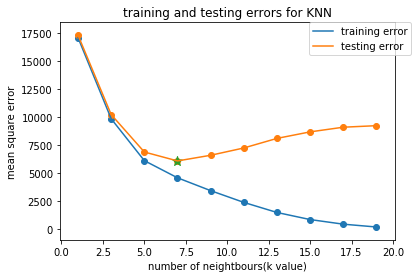

In [140]:
plt.plot(neighbours_list, training_error, label = "training error")
plt.plot(neighbours_list, testing_error, label = "testing error")
plt.scatter(neighbours_list, training_error)
plt.scatter(neighbours_list, testing_error)
plt.scatter(optimal_number_of_neighbours, testing_error[optimal_neighbours_at_index], 100, marker = "*")
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.title("training and testing errors for KNN")
plt.xlabel("number of neightbours(k value)")
plt.ylabel("mean square error")
plt.show()

In [125]:
print("At optimal number of neighbours =", optimal_number_of_neighbours, ", training error is", training_error[optimal_neighbours_at_index],
      "testing error is", testing_error[optimal_neighbours_at_index])

At optimal number of neighbours = 7 , training error is 6125.715779596775 testing error is 8288.219988394632


In [111]:
scores = cross_validate(neigh, X, y, cv=5, scoring= "neg_mean_squared_error")
    
acc = np.mean(scores['train_score'])
training_error.append(acc)
acc = np.mean(scores['test_score'])
testing_error.append(acc)

In [141]:
training_error = []
testing_error = []

from sklearn.tree import DecisionTreeRegressor
depths_list = list(range(1,20,2))
for depth in depths_list:
    regressor = DecisionTreeRegressor(max_depth= depth)
    scores = cross_validate(regressor, X, y, cv=5, scoring= "neg_mean_squared_error")
    
    acc = -np.mean(scores['train_score'])
    training_error.append(acc)
    acc = -np.mean(scores['test_score'])
    testing_error.append(acc)
    

optimal_depths_at_index = np.argmin(np.array(testing_error))
optimal_depth = depths_list[optimal_depths_at_index]

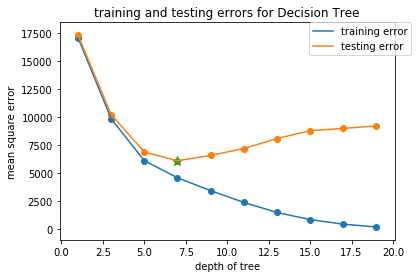

In [142]:
plt.plot(depths_list ,training_error, label = "training error")
plt.plot(depths_list ,testing_error, label = "testing error")
plt.scatter(neighbours_list, training_error)
plt.scatter(neighbours_list, testing_error)
plt.scatter(optimal_depth, testing_error[optimal_depths_at_index], 100, marker = "*")
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.title("training and testing errors for Decision Tree")
plt.xlabel("depth of tree")
plt.ylabel("mean square error")
plt.show()

In [103]:
print("At optimal depth =", optimal_depth, " training error is", training_error[optimal_depths_at_index],
      "testing error is", testing_error[optimal_depths_at_index])

At optimal depth = 7  training error is 4583.107783272879 testing error is 6081.098681062531


In [104]:
regressor = DecisionTreeRegressor(max_depth= optimal_depth)
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [72]:
# import graphviz
# from sklearn.tree import export_graphviz
# dot_data = export_graphviz(regressor, out_file= "tree.dot")
# graph = graphviz.Source(dot_data)
# # graph

# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

In [73]:
# import graphviz
# # from sklearn import tree
# from sklearn.tree import export_graphviz
# from IPython.display import SVG
# dot_data = export_graphviz(regressor, out_file= None)
# graph = graphviz.Source(dot_data)
   
# display(SVG(graph.pipe(format='svg')))

In [74]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(regressor, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

# Problem 5

In [170]:
def accuracy(predicted, actual):
    return sum(predicted == actual)/len(actual) * 100

In [171]:
def confusion_matrix(y_test, y_pred):
    true_indices = y_test == y_pred
    false_indices = ~true_indices
    
    tp = np.sum(y_test[true_indices] == 1)
    tn = np.sum(y_test[true_indices] == 0)
    fp = np.sum(y_test[false_indices] == 0)
    fn = len(y_test) - tp - tn - fp
    
    print("true positives are", tp)
    print("true negatives are", tn)
    print("false positives are", fp)
    print("false negatives are", fn)

In [172]:
sampleDonorData_df.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER',
       'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING',
       'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status',
       'RECENT_CARD_RESPONSE_PROP', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LAST_GIFT_AMT', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT'],
      dtype='object')

In [173]:
binary_variables = ["TARGET_B", "IN_HOUSE", "HOME_OWNER",
                    "PUBLISHED_PHONE", "PEP_STAR", "RECENT_STAR_STATUS"]

In [174]:
# attributes = ["MONTHS_SINCE_ORIGIN", "MONTHS_SINCE_FIRST_GIFT", "NUMBER_PROM_12"]
attributes = ["MONTHS_SINCE_ORIGIN", "MONTHS_SINCE_FIRST_GIFT", "MONTHS_SINCE_LAST_GIFT", "NUMBER_PROM_12"]
# target = "PEP_STAR"
target = "IN_HOUSE"

In [175]:
# plt.figure(figsize=(12, 8))
# plt.subplot(1,2,1)
# sns.violinplot(x = 'PEP_STAR', y = 'RECENT_STAR_STATUS', data = sampleDonorData_df)
# plt.subplot(1,2,2)
# sns.distplot(sampleDonorData_df[sampleDonorData_df['PEP_STAR'] == 1.0]['RECENT_STAR_STATUS'] , label = "1", color = 'red')
# sns.distplot(sampleDonorData_df[sampleDonorData_df['PEP_STAR'] == 0.0]['RECENT_STAR_STATUS'] , label = "0" , color = 'blue')
# plt.show()

In [176]:
sum(sampleDonorData_df[target] == 1)

1418

In [177]:
sampleDonorData_df[target].describe()

count    19372.000000
mean         0.073198
std          0.260469
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: IN_HOUSE, dtype: float64

In [178]:
index = sampleDonorData_df[attributes].dropna().index
X = sampleDonorData_df.loc[index][attributes].values
y = sampleDonorData_df.loc[index][target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [179]:
# training_accuracy = []
# testing_accuracy = []

# from sklearn.neighbors import KNeighborsClassifier

# neighbours_list = list(range(1,20,2))
# for number_of_neighbours in neighbours_list:
#     neigh = KNeighborsClassifier(n_neighbors=number_of_neighbours)
#     neigh.fit(X_train, y_train) 
    
#     y_pred = neigh.predict(X_train)
#     acc = accuracy(y_train, y_pred)
#     training_accuracy.append(acc)
    
#     y_pred = neigh.predict(X_test)
#     acc = accuracy(y_test, y_pred)
#     testing_accuracy.append(acc)

# optimal_neighbours_at_index = np.argmax(np.array(testing_accuracy))
# optimal_number_of_neighbours = neighbours_list[optimal_neighbours_at_index]

In [180]:
# training_accuracy = []
# testing_accuracy = []

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
# X_normalized = min_max_scaler.fit_transform(X)

# neighbours_list = list(range(1,20,2))
# for number_of_neighbours in neighbours_list:
#     print(number_of_neighbours)
#     neigh = KNeighborsClassifier(n_neighbors=number_of_neighbours)
#     scores = cross_validate(clf, X_normalized, y, cv=5, scoring= "accuracy")
    
#     acc = np.mean(scores['train_score'])
#     training_accuracy.append(acc)
#     acc = np.mean(scores['test_score'])
#     testing_accuracy.append(acc)

# optimal_neighbours_at_index = np.argmax(np.array(testing_accuracy))
# optimal_number_of_neighbours = neighbours_list[optimal_neighbours_at_index]

In [181]:
# plt.plot(neighbours_list, training_accuracy, label = "training")
# plt.plot(neighbours_list, testing_accuracy, label = "testzing")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
# plt.show()

In [182]:
# neigh = KNeighborsClassifier(n_neighbors=optimal_number_of_neighbours)
# neigh.fit(X_train, y_train)
# y_pred = neigh.predict(X_test)

# confusion_matrix(y_pred, y_test)

In [183]:
X

array([[ 77,  75,  21,  13],
       [137, 127,  18,  14],
       [137, 129,  18,  13],
       ...,
       [ 77,  68,  16,  14],
       [113, 110,  15,  12],
       [ 29,  23,  23,   9]], dtype=int64)

In [184]:
training_accuracy = []
testing_accuracy = []

from sklearn.neighbors import KNeighborsClassifier

neighbours_list = list(range(1,20,2))
for number_of_neighbours in neighbours_list:
#     print(number_of_neighbours)
    neigh = KNeighborsClassifier(n_neighbors=number_of_neighbours)
    scores = cross_validate(neigh, X, y, cv=5, scoring= "accuracy")
    
    acc = np.mean(scores['train_score'])
    training_accuracy.append(acc)
    acc = np.mean(scores['test_score'])
    testing_accuracy.append(acc)

optimal_neighbours_at_index = np.argmax(np.array(testing_accuracy))
optimal_number_of_neighbours = neighbours_list[optimal_neighbours_at_index]

In [185]:
testing_accuracy

[0.9332541359548069,
 0.9464686381690569,
 0.9485849937593638,
 0.9478110400712831,
 0.9483273556653794,
 0.947811080053734,
 0.9476564678677063,
 0.9483791951128945,
 0.9479661719603747,
 0.9477598136352704]

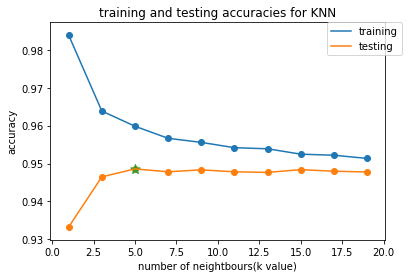

In [186]:
plt.plot(neighbours_list, training_accuracy, label = "training")
plt.plot(neighbours_list, testing_accuracy, label = "testing")
plt.scatter(neighbours_list ,training_accuracy)
plt.scatter(neighbours_list ,testing_accuracy)
plt.scatter(optimal_number_of_neighbours, testing_accuracy[optimal_neighbours_at_index], 100, marker = "*")
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.title("training and testing accuracies for KNN")
plt.xlabel("number of neightbours(k value)")
plt.ylabel("accuracy")
plt.show()

In [187]:
print("At optimal number of neighbours =", optimal_number_of_neighbours, "training accuracy is",
      training_accuracy[optimal_neighbours_at_index], "testing accuracy is", testing_accuracy[optimal_neighbours_at_index])

At optimal number of neighbours = 5 training accuracy is 0.9598389100540882 testing accuracy is 0.9485849937593638


In [188]:
neigh = KNeighborsClassifier(n_neighbors=optimal_number_of_neighbours)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

confusion_matrix(y_pred, y_test)

true positives are 176
true negatives are 3509
false positives are 119
false negatives are 71


In [189]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [190]:
training_accuracy = []
testing_accuracy = []

from sklearn.tree import DecisionTreeClassifier

depths_list = list(range(1,20,2))
for depth in depths_list:
#     print(depth)
    clf = DecisionTreeClassifier(max_depth= depth)
    scores = cross_validate(clf, X, y, cv=5, scoring= "accuracy")
    
    acc = np.mean(scores['train_score'])
    training_accuracy.append(acc)
    acc = np.mean(scores['test_score'])
    testing_accuracy.append(acc)
    

optimal_depths_at_index = np.argmax(np.array(testing_accuracy))
optimal_depth = depths_list[optimal_depths_at_index]

1
3
5
7
9
11
13
15
17
19


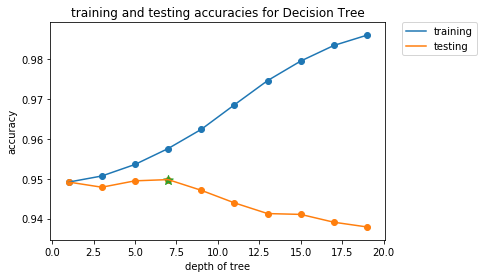

In [191]:
plt.plot(depths_list, training_accuracy, label = "training")
plt.plot(depths_list, testing_accuracy, label = "testing")
plt.scatter(depths_list ,training_accuracy)
plt.scatter(depths_list ,testing_accuracy)
plt.scatter(optimal_depth, testing_accuracy[optimal_depths_at_index], 100, marker = "*")
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.title("training and testing accuracies for Decision Tree")
plt.xlabel("depth of tree")
plt.ylabel("accuracy")
plt.show()

In [192]:
print("At optimal depth =", optimal_depth, "training accuracy is", training_accuracy[optimal_depths_at_index],
      "testing accuracy is", testing_accuracy[optimal_depths_at_index])

At optimal depth = 7 training accuracy is 0.957554729356606 testing accuracy is 0.9497726369099349


In [193]:
clf = DecisionTreeClassifier(max_depth= optimal_depth)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

confusion_matrix(y_pred, y_test)

true positives are 188
true negatives are 3500
false positives are 107
false negatives are 80


In [194]:
training_accuracy = []
testing_accuracy = []

from sklearn.ensemble import GradientBoostingClassifier

depths_list = list(range(1,20,2))
for depth in depths_list:
#     print(depth)
    clf = GradientBoostingClassifier(max_depth= depth)
    scores = cross_validate(clf, X, y, cv=5, scoring= "accuracy")
    
    acc = np.mean(scores['train_score'])
    training_accuracy.append(acc)
    acc = np.mean(scores['test_score'])
    testing_accuracy.append(acc)
    

optimal_depths_at_index = np.argmax(np.array(testing_accuracy))
optimal_depth = depths_list[optimal_depths_at_index]

1
3
5
7
9
11
13
15
17
19


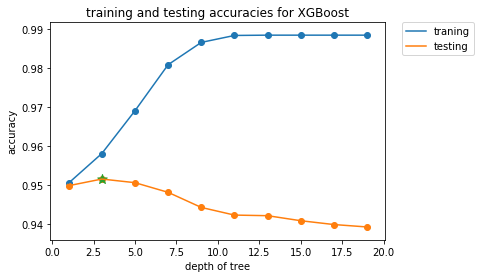

In [195]:
plt.plot(depths_list ,training_accuracy, label="traning")
plt.plot(depths_list ,testing_accuracy, label="testing")
plt.scatter(depths_list ,training_accuracy)
plt.scatter(depths_list ,testing_accuracy)
plt.scatter(optimal_depth, testing_accuracy[optimal_depths_at_index], 100, marker = "*")
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.title("training and testing accuracies for XGBoost")
plt.xlabel("depth of tree")
plt.ylabel("accuracy")
plt.show()

In [196]:
print("At optimal depth =", optimal_depth, "training accuracy is", training_accuracy[optimal_depths_at_index],
      "testing accuracy is", testing_accuracy[optimal_depths_at_index])

At optimal depth = 3 training accuracy is 0.9580192737920669 testing accuracy is 0.9514762092011486


In [197]:
clf = DecisionTreeClassifier(max_depth= optimal_depth)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

confusion_matrix(y_pred, y_test)

true positives are 220
true negatives are 3476
false positives are 75
false negatives are 104


In [209]:
training_accuracy = []
testing_accuracy = []

from sklearn.ensemble import RandomForestClassifier

depths_list = list(range(1,20,2))
for depth in depths_list:
#     print(depth)
    clf = RandomForestClassifier(n_estimators=100, max_depth=depth,
                             random_state=0)
    # clf.fit(X, y)  
    scores = cross_validate(clf, X, y, cv=5, scoring= "accuracy")
    
    acc = np.mean(scores['train_score'])
    training_accuracy.append(acc)
    acc = np.mean(scores['test_score'])
    testing_accuracy.append(acc)
    

optimal_depths_at_index = np.argmax(np.array(testing_accuracy))
optimal_depth = depths_list[optimal_depths_at_index]

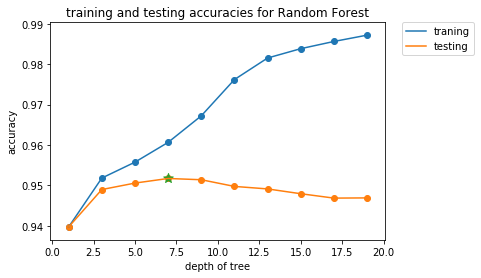

In [210]:
plt.plot(depths_list ,training_accuracy, label="traning")
plt.plot(depths_list ,testing_accuracy, label="testing")
plt.scatter(depths_list ,training_accuracy)
plt.scatter(depths_list ,testing_accuracy)
plt.scatter(optimal_depth, testing_accuracy[optimal_depths_at_index], 100, marker = "*")
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.title("training and testing accuracies for Random Forest")
plt.xlabel("depth of tree")
plt.ylabel("accuracy")
plt.show()

In [211]:
print("At optimal depth =", optimal_depth, "training accuracy is", training_accuracy[optimal_depths_at_index],
      "testing accuracy is", testing_accuracy[optimal_depths_at_index])

At optimal depth = 7 training accuracy is 0.9606648488904389 testing accuracy is 0.9517342204256893


In [212]:
testing_accuracy

[0.9397586143406187,
 0.9489982968096801,
 0.9505987898600695,
 0.9517342204256893,
 0.9514243031116287,
 0.9497723037755893,
 0.9491527890208354,
 0.9479656256390365,
 0.946881781303329,
 0.9469332876096186]

In [213]:
optimal_depth

7

In [203]:
clf = DecisionTreeClassifier(max_depth= optimal_depth)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

confusion_matrix(y_pred, y_test)

true positives are 189
true negatives are 3500
false positives are 106
false negatives are 80


In [204]:
clf.feature_importances_

array([0.00627097, 0.08829982, 0.06652662, 0.8389026 ])

In [205]:
attributes

['MONTHS_SINCE_ORIGIN',
 'MONTHS_SINCE_FIRST_GIFT',
 'MONTHS_SINCE_LAST_GIFT',
 'NUMBER_PROM_12']